# GHG forcing

We create scenario forcing data from Input4MIPS data at DKRZ.

In [1]:
import glob
from os import path as op

import xarray as xr

In [173]:
import re

import pandas as pd


def read_remo_ghg(fname):
    return pd.read_csv(fname, skiprows=4, header=None, delim_whitespace=True, 
                       names=["time", "CO2", "CH4", "N2O", "CFC_11", "CFC_12"])


def get_remo_data(files):
    return {re.findall('rcp[0-9]+', op.basename(f))[0]: read_remo_ghg(f) for f in files}
    
    
def get_echam_data(files):
    return {re.findall('ssp[0-9]+', op.basename(f))[0]: xr.open_dataset(f) for f in files}
    
    
def concat(dsets):
    concat_dim = xr.DataArray(list(dsets.keys()), dims="scenario")
    ds = xr.concat(dsets.values(), dim=concat_dim, join="override").squeeze(drop=True)
    ds["time"] = ds.time.astype(int)
    return ds.drop("time_bnds")

In [174]:
echam_files = glob.glob("/pool/data/ECHAM6/input/r0008/greenhouse_ssp*.nc")
echam_files.sort()
echam_files

remo_ghg = glob.glob("/pool/data/remo/GHG_*_1850-2101.txt")
remo_ghg.sort()
remo_ghg

['/pool/data/remo/GHG_rcp26_1850-2101.txt',
 '/pool/data/remo/GHG_rcp45_1850-2101.txt',
 '/pool/data/remo/GHG_rcp85_1850-2101.txt']

In [175]:
remo_cmip5 = get_remo_data(remo_ghg)#['rcp26']

In [176]:
echam = concat(get_echam_data(echam_files))
echam

<xarray.Dataset>
Dimensions:   (time: 2501, scenario: 5)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 ... 2494 2495 2496 2497 2498 2499 2500
  * scenario  (scenario) <U6 'ssp119' 'ssp126' 'ssp245' 'ssp370' 'ssp585'
Data variables:
    CO2       (scenario, time) float64 277.5 277.1 277.2 ... 2.01e+03 2.01e+03
    CH4       (scenario, time) float64 645.0 653.5 653.6 ... 1.019e+03 1.019e+03
    N2O       (scenario, time) float64 267.3 267.3 267.3 ... 406.6 406.6 406.6
    CFC_11    (scenario, time) float64 0.0 0.0 0.0 ... 0.004189 0.004138
    CFC_12    (scenario, time) float64 0.0 0.0 0.0 0.0 ... 1.436 1.418 1.4 1.391
Attributes: (12/29)
    CDI:                     Climate Data Interface version 1.9.8 (https://mp...
    Conventions:             CF-1.6
    history:                 Thu Oct 14 13:15:41 2021: cdo -s mergetime green...
    source:                  UoM-CMIP-1-2-0: Historical GHG mole fractions fr...
    institution:             Australian-German Climate & Energy College, The ...
    comment:                 Data provided are global and hemispheric area-we...
    ...                      ...
    contact:                 malte.meinshausen@unimelb.edu.au
    table_id:                input4MIPs
    source_id:               UoM-CMIP-1-2-0
    tracking_id:             hdl:21.14100/18da2d96-a1e4-40f4-9bd5-0a435ff78e55
    nominal_resolution:      10000 km
    CDO:                     Climate Data Operators version 1.9.8 (https://mp...

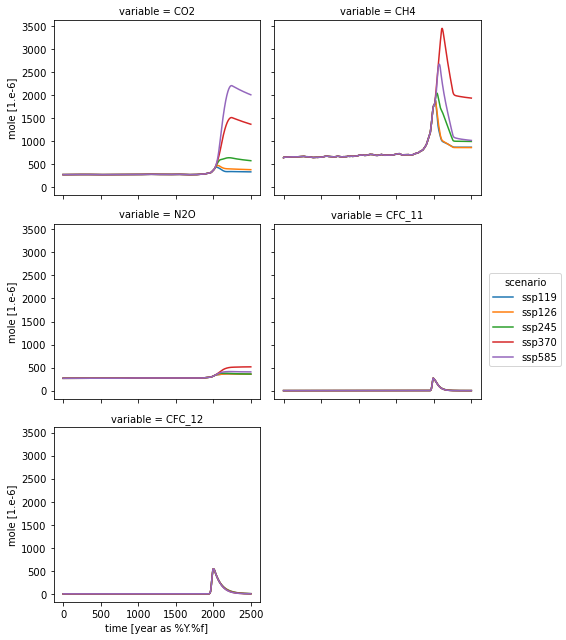

In [91]:
xr.concat([ds[var] for var in ds.data_vars], dim=xr.DataArray(ds.data_vars, dims="variable")).plot(hue="scenario", col="variable", col_wrap=2)

## input4MIPs

In [6]:
mapping = {"CO2": "mole_fraction_of_carbon_dioxide_in_air", 
           "CH4": "mole_fraction_of_methane_in_air",
           "N2O": "mole_fraction_of_nitrous_oxide_in_air",
           "CFC_11": "mole_fraction_of_cfc11_in_air",
           "CFC_12": "mole_fraction_of_cfc12_in_air"}

mapping = {'mole_fraction_of_carbon_dioxide_in_air': 'CO2',
           'mole_fraction_of_methane_in_air': 'CH4',
           'mole_fraction_of_nitrous_oxide_in_air': 'N2O',
           'mole_fraction_of_cfc11_in_air': 'CFC_11',
           'mole_fraction_of_cfc12_in_air': 'CFC_12'}

In [7]:
import numpy as np
import xarray as xr

historicals = ['/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-carbon-dioxide-in-air/gr1-GMNHSH/v20160830/mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc',
               '/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-methane-in-air/gr1-GMNHSH/v20160830/mole-fraction-of-methane-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc',
               '/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-nitrous-oxide-in-air/gr1-GMNHSH/v20160830/mole-fraction-of-nitrous-oxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc',
               '/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-cfc11-in-air/gr1-GMNHSH/v20160830/mole-fraction-of-cfc11-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc',
               '/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-cfc12-in-air/gr1-GMNHSH/v20160830/mole-fraction-of-cfc12-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc']


hist = xr.open_mfdataset(historicals, decode_times=False)
hist["time"] = np.arange(hist.time.size)#np.floor(hist.time / 365).astype(int)

In [8]:
scenarios = [op.basename(f) for f in glob.glob("/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/ScenarioMIP/UoM/*")]
scenarios
del scenarios[-1]
scenarios

['UoM-REMIND-MAGPIE-ssp585-1-2-1',
 'UoM-GCAM4-ssp434-1-2-1',
 'UoM-REMIND-MAGPIE-ssp534-over-1-2-0',
 'UoM-IMAGE-ssp119-1-2-1',
 'UoM-GCAM4-ssp460-1-2-0',
 'UoM-GCAM4-ssp460-1-2-1',
 'UoM-GCAM4-ssp434-1-2-0',
 'UoM-IMAGE-ssp126-1-2-1',
 'UoM-MESSAGE-GLOBIOM-ssp245-1-2-0',
 'UoM-AIM-ssp370-1-2-0',
 'UoM-IMAGE-ssp126-1-2-0',
 'UoM-REMIND-MAGPIE-ssp585-1-2-0',
 'UoM-IMAGE-ssp119-1-2-0',
 'UoM-MESSAGE-GLOBIOM-ssp245-1-2-1',
 'UoM-REMIND-MAGPIE-ssp534-over-1-2-1',
 'UoM-AIM-ssp370-1-2-1']

In [122]:
def get_url(source_id, variable_id, activity_id):
    return f"/work/kd0956/INPUT4MIPS/data/input4MIPs/CMIP6/{activity_id}/UoM/{source_id}/atmos/yr/{variable_id}/gr1-GMNHSH/*/*"


def create_historical_dataset(mapping, sector=0):
    """
    """
    # decode_times = False, since calendar is no cf standard.
    ds = create_dataset('UoM-CMIP-1-2-0', mapping, "CMIP", sector=sector, decode_times=False)
    ds['time'] = np.arange(ds.dims['time'])

    return ds

def create_dataset(source_id, mapping, activity_id, sector=0, **kwargs):
    mapp = mapping
    if source_id == 'UoM-CMIP-1-2-0':
        # For some reason, here the variables names are written with "minus" 
        # instead of underscore(?), weired... we replace underscore with minus then...
        mapp = {k.replace("_", "-"): v for k, v in mapp.items()}
    urls = []
    for key in mapp.keys():
        url = get_url(source_id, key, activity_id)
        paths = glob.glob(url)
        if len(paths) > 1:
            raise Exception('no unique selection')
        elif len(paths) == 0:
            print(url)
            raise Exception('no files found')
        urls.append(paths[0])
    #urls = [glob.glob(get_url(scenario, value))[0] for value in mapping.keys()]
    return xr.open_mfdataset(urls, **kwargs).isel(sector=0, drop=True).drop(['time_bnds', 'sector_bnds']).rename(mapping)#.squeeze(drop=True)
    #return xr.concat([ds[var] for var in mapping.values()], dim=xr.DataArray(list(mapping.keys()), dims='molecule'))
    
def all_scenarios(mapping, scenarios):
    dsets = {s: create_dataset(s, mapping, 'ScenarioMIP') for s in scenarios}
    dim = xr.DataArray(list(dsets.keys()), dims="scenario")
    return xr.concat(list(dsets.values()), dim=dim)

In [123]:
hist = create_historical_dataset(mapping)
hist

<xarray.Dataset>
Dimensions:  (time: 2015)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 2008 2009 2010 2011 2012 2013 2014
Data variables:
    CO2      (time) float32 dask.array<chunksize=(2015,), meta=np.ndarray>
    CFC_11   (time) float32 dask.array<chunksize=(2015,), meta=np.ndarray>
    CFC_12   (time) float32 dask.array<chunksize=(2015,), meta=np.ndarray>
    CH4      (time) float32 dask.array<chunksize=(2015,), meta=np.ndarray>
    N2O      (time) float32 dask.array<chunksize=(2015,), meta=np.ndarray>
Attributes: (12/26)
    Conventions:             CF-1.6
    comment:                 Data provided are global and hemispheric area-we...
    variable_id:             mole_fraction_of_carbon_dioxide_in_air
    product:                 assimilated observations
    creation_date:           2016-08-30T18:24:56Z
    frequency:               yr
    ...                      ...
    contact:                 malte.meinshausen@unimelb.edu.au
    table_id:                input4MIPs
    source_id:               UoM-CMIP-1-2-0
    institution:             Australian-German Climate & Energy College, The ...
    tracking_id:             hdl:21.14100/18da2d96-a1e4-40f4-9bd5-0a435ff78e55
    nominal_resolution:      10000 km

In [124]:
scens = all_scenarios(mapping, scenarios)
scens['time'] = scens.time.dt.year
scens

<xarray.Dataset>
Dimensions:   (time: 486, scenario: 16)
Coordinates:
  * time      (time) int64 2015 2016 2017 2018 2019 ... 2496 2497 2498 2499 2500
  * scenario  (scenario) <U35 'UoM-REMIND-MAGPIE-ssp585-1-2-1' ... 'UoM-AIM-s...
Data variables:
    CO2       (scenario, time) float64 dask.array<chunksize=(1, 486), meta=np.ndarray>
    CFC_11    (scenario, time) float64 dask.array<chunksize=(1, 486), meta=np.ndarray>
    CFC_12    (scenario, time) float64 dask.array<chunksize=(1, 486), meta=np.ndarray>
    CH4       (scenario, time) float64 dask.array<chunksize=(1, 486), meta=np.ndarray>
    N2O       (scenario, time) float64 dask.array<chunksize=(1, 486), meta=np.ndarray>
Attributes: (12/26)
    title:               UoM-REMIND-MAGPIE-ssp585-1-2-1: REMIND-MAGPIE-ssp585...
    institution_id:      UoM
    dataset_category:    GHGConcentrations
    source_version:      1.2.1
    institution:         Australian-German Climate & Energy College, The Univ...
    activity_id:         input4MIPs
    ...                  ...
    references:          Malte Meinshausen, Zebedee Nicholls, et al. Future s...
    grid:                global and hemispheric means - area-averages from th...
    grid_label:          gr1-GMNHSH
    nominal_resolution:  10000 km
    variable_id:         mole_fraction_of_carbon_dioxide_in_air
    comment:             Note: Zonal means for 15-degree lat bands or 0.5-deg...

In [128]:
ds = xr.concat([hist, scens], dim='time')

For some reason, here the variables names are written with "minus" instead of underscore(?):

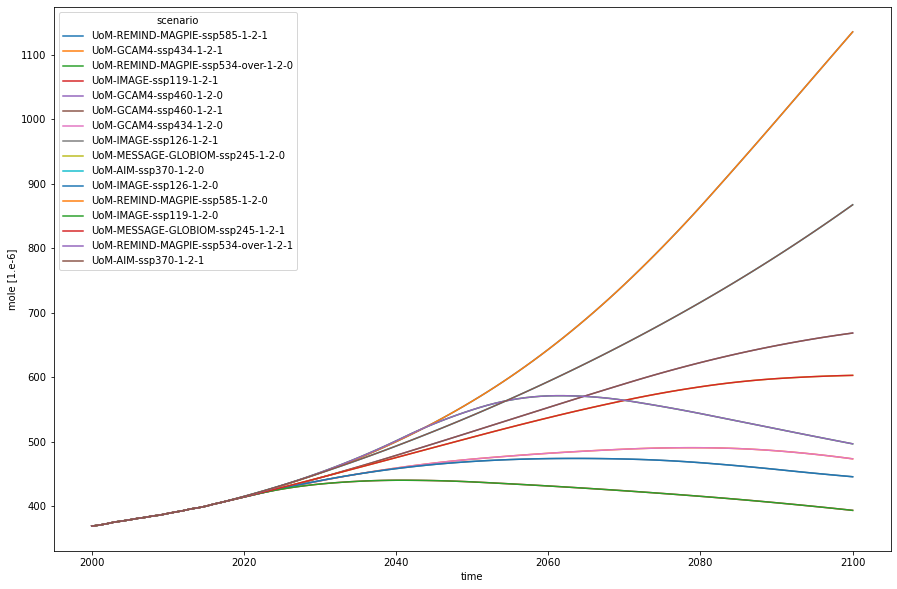

In [206]:
ds.sel(time=slice('2000','2100')).CO2.plot(hue='scenario', figsize=(15,10))

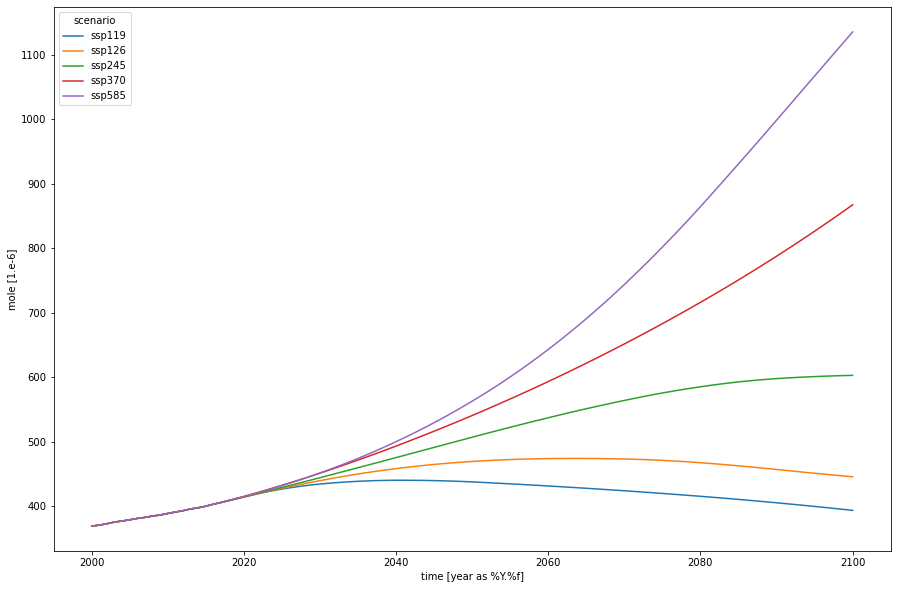

In [210]:
echam.sel(time=slice('2000','2100')).CO2.plot(hue='scenario', figsize=(15,10))

In [142]:
remo_cmip6_df#.set_index('time').to_xarray()

,time,CO2,CH4,N2O,CFC_11,CFC_12
0,1850,284.73,790.98,275.43,0.00,0.00
1,1851,284.88,792.25,275.50,0.00,0.00
2,1852,285.00,793.75,275.60,0.00,0.00
3,1853,285.12,795.25,275.70,0.00,0.00
4,1854,285.27,796.75,275.80,0.00,0.00
...,...,...,...,...,...,...
247,2097,422.43,1257.86,344.13,38.64,203.08
248,2098,421.92,1256.49,344.09,37.76,200.75
249,2099,421.40,1255.07,344.06,36.90,198.44
250,2100,420.90,1253.63,344.02,36.05,196.15


In [156]:
def remo_cmip5_df(df_dict):
    for scen, df in df_dict.items():
        df['scenario'] = scen
    return pd.concat(df_dict.values())
        

In [184]:
cmip5 = remo_cmip5_df(remo_cmip5).set_index(['time', 'scenario']).to_xarray()
cmip5

<xarray.Dataset>
Dimensions:   (time: 252, scenario: 3)
Coordinates:
  * time      (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100 2101
  * scenario  (scenario) object 'rcp26' 'rcp45' 'rcp85'
Data variables:
    CO2       (time, scenario) float64 284.7 284.7 284.7 ... 420.4 538.9 945.1
    CH4       (time, scenario) float64 791.0 791.0 791.0 ... 1.573e+03 3.758e+03
    N2O       (time, scenario) float64 275.4 275.4 275.4 ... 344.0 372.6 436.5
    CFC_11    (time, scenario) float64 0.0 0.0 0.0 0.0 ... 35.23 31.15 25.14
    CFC_12    (time, scenario) float64 0.0 0.0 0.0 0.0 ... 193.9 182.6 164.6

In [185]:
remo_forcings = xr.concat([ds, cmip5], dim="scenario")

In [186]:
remo_forcings

<xarray.Dataset>
Dimensions:   (time: 2501, scenario: 19)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 ... 2494 2495 2496 2497 2498 2499 2500
  * scenario  (scenario) object 'UoM-REMIND-MAGPIE-ssp585-1-2-1' ... 'rcp85'
Data variables:
    CO2       (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    CFC_11    (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    CFC_12    (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    CH4       (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    N2O       (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
Attributes: (12/26)
    Conventions:             CF-1.6
    comment:                 Data provided are global and hemispheric area-we...
    variable_id:             mole_fraction_of_carbon_dioxide_in_air
    product:                 assimilated observations
    creation_date:           2016-08-30T18:24:56Z
    frequency:               yr
    ...                      ...
    contact:                 malte.meinshausen@unimelb.edu.au
    table_id:                input4MIPs
    source_id:               UoM-CMIP-1-2-0
    institution:             Australian-German Climate & Energy College, The ...
    tracking_id:             hdl:21.14100/18da2d96-a1e4-40f4-9bd5-0a435ff78e55
    nominal_resolution:      10000 km

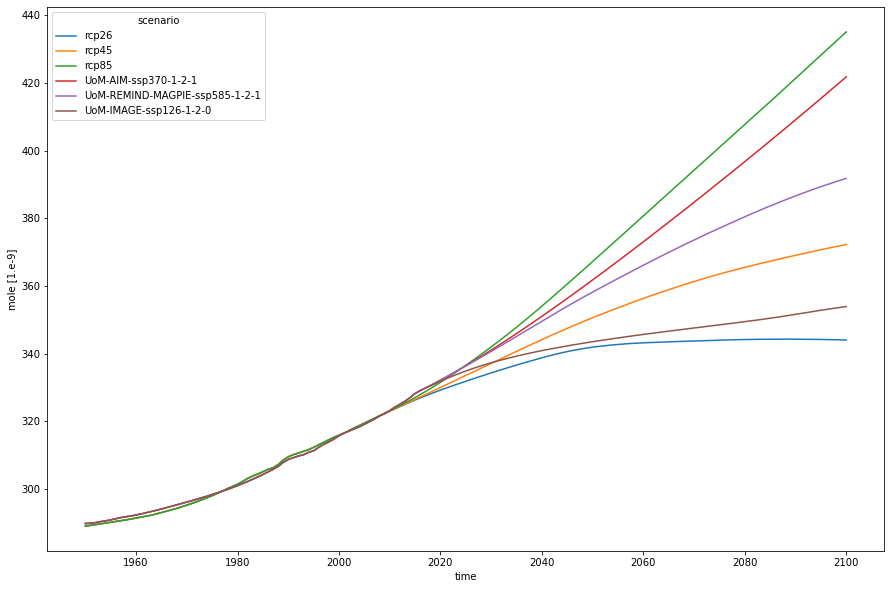

In [197]:
remo_forcings.sel(scenario=['rcp26', 'rcp45', 'rcp85', 'UoM-AIM-ssp370-1-2-1', 'UoM-REMIND-MAGPIE-ssp585-1-2-1', 'UoM-IMAGE-ssp126-1-2-0']).sel(time=slice('1950','2100')).N2O.plot(hue='scenario', figsize=(15,10))

The `rcp85` scenario actually seems a little low in 2100?

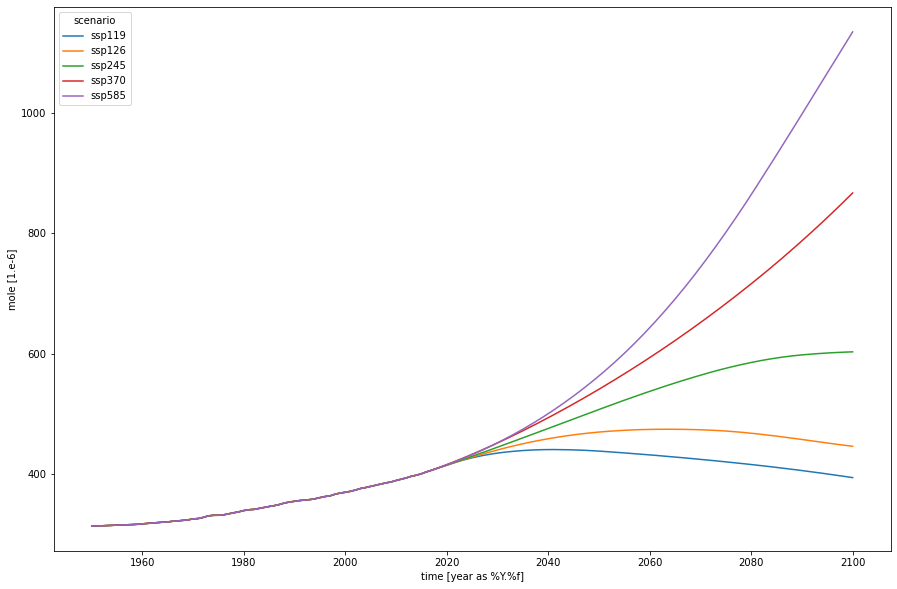

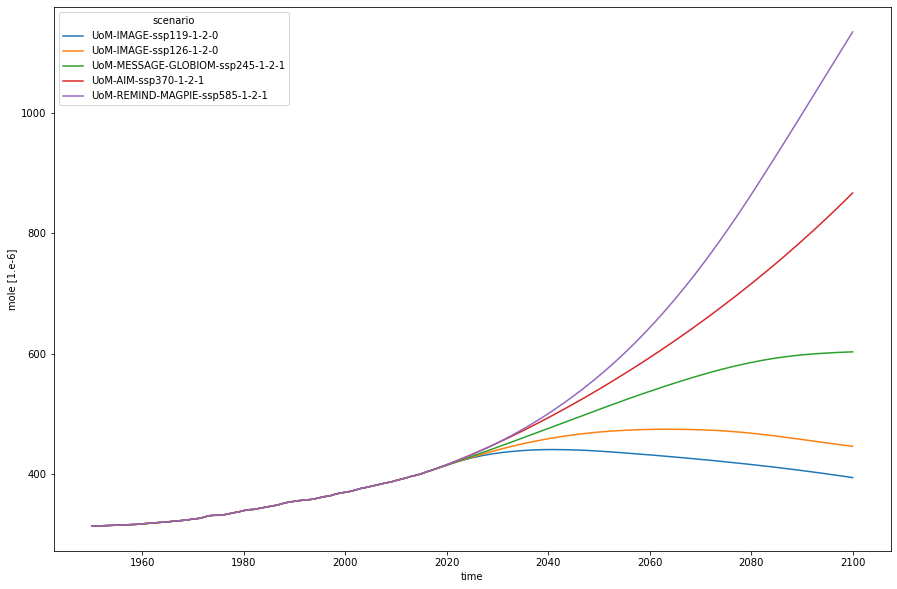

In [212]:
echam.sel(time=slice('1950','2100')).CO2.plot(hue='scenario', figsize=(15,10))
remo_forcings.sel(scenario=['UoM-IMAGE-ssp119-1-2-0', 'UoM-IMAGE-ssp126-1-2-0', 'UoM-MESSAGE-GLOBIOM-ssp245-1-2-1', 'UoM-AIM-ssp370-1-2-1', 'UoM-REMIND-MAGPIE-ssp585-1-2-1' ]).sel(time=slice('1950','2100')).CO2.plot(hue='scenario', figsize=(15,10))

In [213]:
remo_forcings

<xarray.Dataset>
Dimensions:   (time: 2501, scenario: 19)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 ... 2494 2495 2496 2497 2498 2499 2500
  * scenario  (scenario) object 'UoM-REMIND-MAGPIE-ssp585-1-2-1' ... 'rcp85'
Data variables:
    CO2       (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    CFC_11    (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    CFC_12    (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    CH4       (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
    N2O       (time, scenario) float64 dask.array<chunksize=(2015, 1), meta=np.ndarray>
Attributes: (12/26)
    Conventions:             CF-1.6
    comment:                 Data provided are global and hemispheric area-we...
    variable_id:             mole_fraction_of_carbon_dioxide_in_air
    product:                 assimilated observations
    creation_date:           2016-08-30T18:24:56Z
    frequency:               yr
    ...                      ...
    contact:                 malte.meinshausen@unimelb.edu.au
    table_id:                input4MIPs
    source_id:               UoM-CMIP-1-2-0
    institution:             Australian-German Climate & Energy College, The ...
    tracking_id:             hdl:21.14100/18da2d96-a1e4-40f4-9bd5-0a435ff78e55
    nominal_resolution:      10000 km